# Coding Gradient Descent

In this notebook the following task will be performed:

* Creating functions to go through the steps of a single Gradient Descent Epoch. 
* Combining the functions and looping through the entire Gradient Descent procedure.

For simplification purposes, the tasks will be performed over a simple linear regression.

## 1. Data Exploration

Importing dataset to perform the tasks.

In [0]:
import pandas as pd

data = pd.read_csv("https://CMoranoA.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


There is some Linear relationship between the `Phosphorus` and `Zinc`. So Gradient Descent will be used to find the line of best fit.

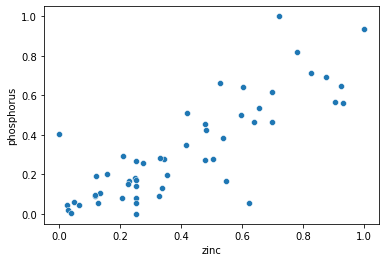

In [0]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

Creating the two `np.Array`
- `data_X` for zinc
- `data_Y` for phosphorus

In [0]:
import numpy as np
data_X = np.array(data['zinc'])
data_Y = np.array(data['phosphorus'])

In [0]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Code one Epoch

Defining the key functions used to update the parameters during one epoch $\color {red}{(k)}$ of gradient descent. Following the the formula below

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$


### 2.1 Hypothesis Function of Linear Regression

$$
\hat{y} =  a x + b
$$

In [0]:
def h(X,a,b):
    y_pred = a*X + b
    return y_pred

### 2.2 Loss Function - Sum of Squares

$$
Sum\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

👇 Define the SSR Loss Function for the above created Hypothesis Function. Reuse `h` coded above


In [0]:
import numpy as np

def loss(X,Y,a,b):
    Y_pred = h(X,a,b)
    loss = np.sum((Y-Y_pred) ** 2)
    return loss

Checking the total Loss computed if:
- a = 1 
- b = 1

In [0]:
loss(data_X,data_Y,1,1)

63.868506986115456

### 2.3 Gradient

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

Defining a function to compute the partial derivatives of the Loss Function relative to parameter `a` and `b`.


In [0]:
def gradient(X,Y,a,b):

    Y_pred = h(X,a,b)
    d_a = np.sum(-2*(Y-Y_pred)*X)
    d_b = np.sum(-2*(Y-Y_pred))

    return d_a, d_b

In [0]:
gradient(data_X,data_Y,1,1)

(48.459065809109006, 115.17923733301406)

### 2.4 Step Sizes

$$
step\ size = gradient \cdot learning\ rate
$$

Defining a function that calculates the step sizes alongside each parameter (`a`,`b`), according to their derivatives (`d_a`, `d_b`) and a learning_rate equals to 0.01 by default

In [0]:
def steps(d_a,d_b, learning_rate = 0.01):

    step_a = d_a*learning_rate
    step_b = d_b*learning_rate

    return (step_a, step_b)

In [0]:
d_a, d_b = gradient(data_X,data_Y,1,1)

steps(d_a,d_b,learning_rate = 0.01)

(0.4845906580910901, 1.1517923733301405)

### 2.5 Update parameters (a, b)

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

👇 Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [0]:
def update_params(a, b, step_a, step_b):

    a_new = a - step_a
    b_new = b - step_b

    return a_new , b_new

### 2.6 One full epoch

Computing the updated parameters at the end of the first Epoch, starting with parameters:
- a = 1
- b = 1

In [0]:
a = 1
b = 1

d_a, d_b = gradient(data_X,data_Y,a,b)

step_a, step_b = steps(d_a,d_b,learning_rate = 0.01)

a_new, b_new = update_params(a,b,step_a,step_b)

print(a_new)
print(b_new)

0.5154093419089099
-0.1517923733301405


## 3. Gradient Descent

**Looping** through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 1`
- Convergence to be **100 epochs**
- Appending the value of the loss, a, and b at each epoch to a list called `loss_history`, `a_history` and `b_history`

In [0]:
# Initialize a and b
a = 1
b = 1
loss_history = []
a_history = []
b_history = []

# Loop through steps to perform Gradient Descent
for epoch in range(100):
    
    # Compute Loss at each Epoch and append to loss_history
    loss_epoch = loss(data_X,data_Y,a,b)
    loss_history.append(loss_epoch)
    
    # Compute the gradient (the two partial derivatives) 
    d_a, d_b = gradient(data_X,data_Y,a,b)
    
    # Compute steps
    step_a, step_b = steps(d_a,d_b)
    
    # Compute updated parameters
    a, b = update_params(a, b, step_a,step_b)
    a_history.append(a)
    b_history.append(b)

In [0]:
a_100 = a
b_100 = b
print(a,b)

0.768671510620374 0.00708932115622393


## 4. Visual check

Wrapping this iterative approach into a method `gradient_descent()` which returns new a/b and `history`, a dictionary containing the 
- `loss_history`
- `a_history`
- `b_history`

In [0]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):

    a = a_init
    b = b_init
    loss_history = []
    a_history = []
    b_history = []
    
    for epoch in range(n_epochs):
        a_history.append(a)
        b_history.append(b)
        loss_epoch = loss(X,Y,a,b)
        loss_history.append(loss_epoch)
        
        d_a, d_b = gradient(X,Y,a,b)

        step_a, step_b = steps(d_a,d_b,learning_rate)

        a_new, b_new = update_params(a, b, step_a, step_b)
        
        a = a_new
        b = b_new

    history = {'loss': loss_history, 'a': a_history, 'b': b_history}

    return a_new, b_new, history

In [0]:
a_best, b_best, history = gradient_descent(data_X,data_Y, learning_rate=0.001)

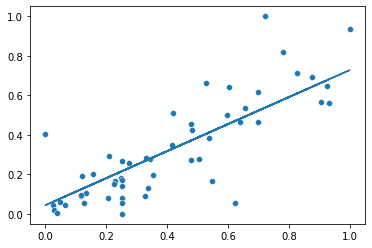

In [0]:
import matplotlib.pyplot as plt
sns.scatterplot(x=data_X, y=data_Y)
plt.plot(data_X, h(data_X,a_best,b_best))

## 5. Visualize

Plotting loss function and the descent steps on a 2D surface

Creating data:
- `range_a` a range of 100 values for `a` equally spaced between -1 and 1
- `range_b` a range of 100 values for `b` equally spaced between -1 and 1 
- `Z` a 2D-array where each elements `Z[j,i]` is equal to the value of the loss function at `a` = `range_a[i]` and `b` = `range_b[j]`

In [0]:
range_a = np.linspace(-1,1,100)
range_b = np.linspace(-1,1,100)

In [0]:
Z = np.zeros((len(range_a),len(range_b)))
for (i, a) in enumerate(range_a):
    for (j, b) in enumerate(range_b):
        Z[j,i] = loss(data_X,data_Y,a,b)

Plotting in one single subplot, gradient descent and historical:

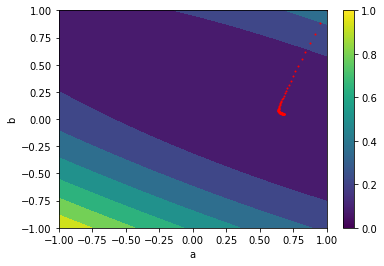

In [0]:
plt.contourf(range_a, range_b, Z)
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(history['a'], history['b'], c='r', s=1)
plt.colorbar();

History of the `loss` values as a function of number of `epochs` varying the `learning_rate` from 0.001 to 0.01

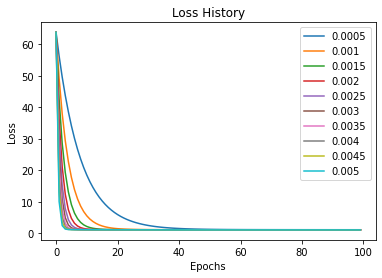

In [0]:
for l in np.linspace(0.0005, 0.005, num=10):
    a_best, b_best, history = gradient_descent(data_X,data_Y, learning_rate=l)
    plt.plot(history['loss'], label=f'{round(l,5)}')
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## 6. With Sklearn...

Comparing parameters with SKlearn on the same date.

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data_X.reshape(-1,1), data_Y)
slope, intercept = model.coef_, model.intercept_ 
print(slope,intercept)

[0.76883717] 0.0070177202010621165
